<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/proj1_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.9 MB/s 


In [ ]:
 pip install dicom2nifti 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 13.0 MB 10.7 MB/s 


In [ ]:
import dicom2nifti
path_to_dicom_series = '/content/drive/MyDrive/Subject (1000)'
path_to_save_nifti_file = '/content/drive/MyDrive/sub100_nifti'

dicom2nifti.convert_directory(path_to_dicom_series, path_to_save_nifti_file,'pt1.nii.gz')

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_dir.py", line 85, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_dicom.py", line 117, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_generic.py", line 103, in dicom_to_nifti
    if common.is_multiframe_dicom(dicom_input):
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/common.py", line 148, in is_multiframe_dicom
    header = dicom_input[0]
IndexError: list index out of range


(512, 512, 219)


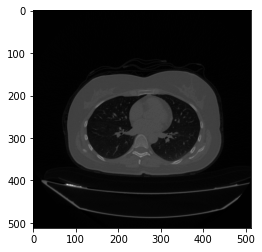

In [ ]:
# visulize NIFTI dataset
import matplotlib.pyplot as plt
import nibabel as nib
import scipy.ndimage as ndi

ct = nib.load('/content/drive/MyDrive/sub100_nifti/4_mediastinum.nii.gz').get_fdata()
print(ct.shape)

test = ct[:,:,116]
plt.imshow(ndi.rotate(test, 90), cmap = 'gray')
plt.show()

In [ ]:
# #######################
# keras dataset

import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# #######################
# keras dataset

import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Download url of normal CT scans.
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-0.zip"
filename = os.path.join(os.getcwd(), "CT-0.zip")
keras.utils.get_file(filename, url)

# Download url of abnormal CT scans.
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-23.zip"
filename = os.path.join(os.getcwd(), "CT-23.zip")
keras.utils.get_file(filename, url)

# Make a directory to store the data.
os.makedirs("MosMedData")

# Unzip data in the newly created directory.
with zipfile.ZipFile("CT-0.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

with zipfile.ZipFile("CT-23.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

1045162547/1045162547 [==============================] - 120s 0us/step


In [ ]:
import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [ ]:
import os
# Folder "CT-0" consist of CT scans having normal lung tissue,
# no CT-signs of viral pneumonia.
normal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-0", x)
    for x in os.listdir("MosMedData/CT-0")
]
# Folder "CT-23" consist of CT scans having several ground-glass opacifications,
# involvement of lung parenchyma.
abnormal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-23", x)
    for x in os.listdir("MosMedData/CT-23")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths)))

CT scans with normal lung tissue: 100
CT scans with abnormal lung tissue: 100


In [ ]:
# Read and process the scans.
# Each scan is resized across height, width, and depth and rescaled.
abnormal_scans = np.array([process_scan(path) for path in abnormal_scan_paths])
normal_scans = np.array([process_scan(path) for path in normal_scan_paths])

# For the CT scans having presence of viral pneumonia
# assign 1, for the normal ones assign 0.
abnormal_labels = np.array([1 for _ in range(len(abnormal_scans))])
normal_labels = np.array([0 for _ in range(len(normal_scans))])

# Split data in the ratio 70-30 for training and validation.
x_train = np.concatenate((abnormal_scans[:70], normal_scans[:70]), axis=0)
y_train = np.concatenate((abnormal_labels[:70], normal_labels[:70]), axis=0)
x_val = np.concatenate((abnormal_scans[70:], normal_scans[70:]), axis=0)
y_val = np.concatenate((abnormal_labels[70:], normal_labels[70:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)

Number of samples in train and validation are 140 and 60.


In [ ]:
print(x_val[0].shape)
print(y_val[0])
print(y_val)



(128, 128, 64)
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [ ]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

Dimension of the CT scan is: (128, 128, 64, 1)


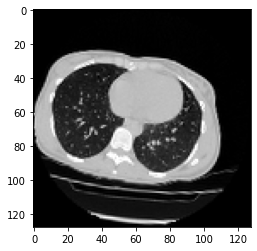

In [ ]:
import matplotlib.pyplot as plt

data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[0]
print("Dimension of the CT scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")

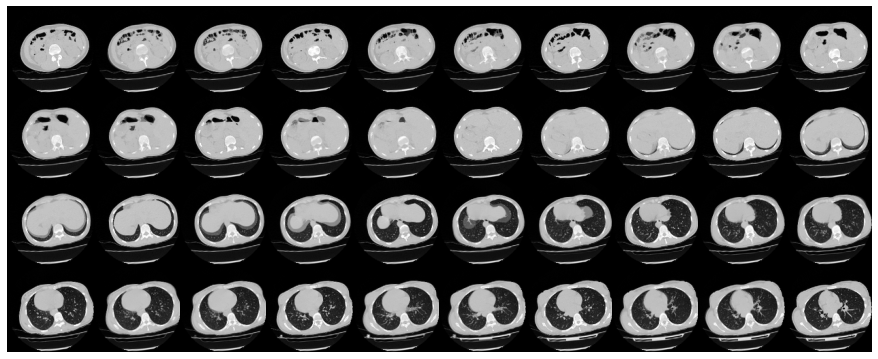

In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 128, 128, image[:, :, :40])

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv3D, Dense, Flatten, Dropout,MaxPool3D, GlobalAveragePooling3D
from keras.layers import Concatenate

** SIX LAYER NEURAL NETWORK **


***CONV layer 1***

layer = 1 , Filters = 64 filter_size= 9 S = 2 , P = same , activation = Relu 

***CONV layer 2***

layer = 2 , Filters = 64 filter_size= 5 S = 2 , P = same , activation = Relu 

***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***

***CONV layer 3***

layer = 1 , Filters = 128 filter_size= 9 S = 2 , P = same , activation = Relu 

***CONV layer 4***

layer = 1 , Filters = 256 filter_size= 5 S = 2 , P = same , activation = Relu 

***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***

***CONV layer 5***

layer = 1 , Filters = 128 filter_size= 7 S = 2 , P = same , activation = Relu 

***CONV layer 6***

layer = 1 , Filters = 256 filter_size= 3 S = 2 , P = same , activation = Relu 

***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***






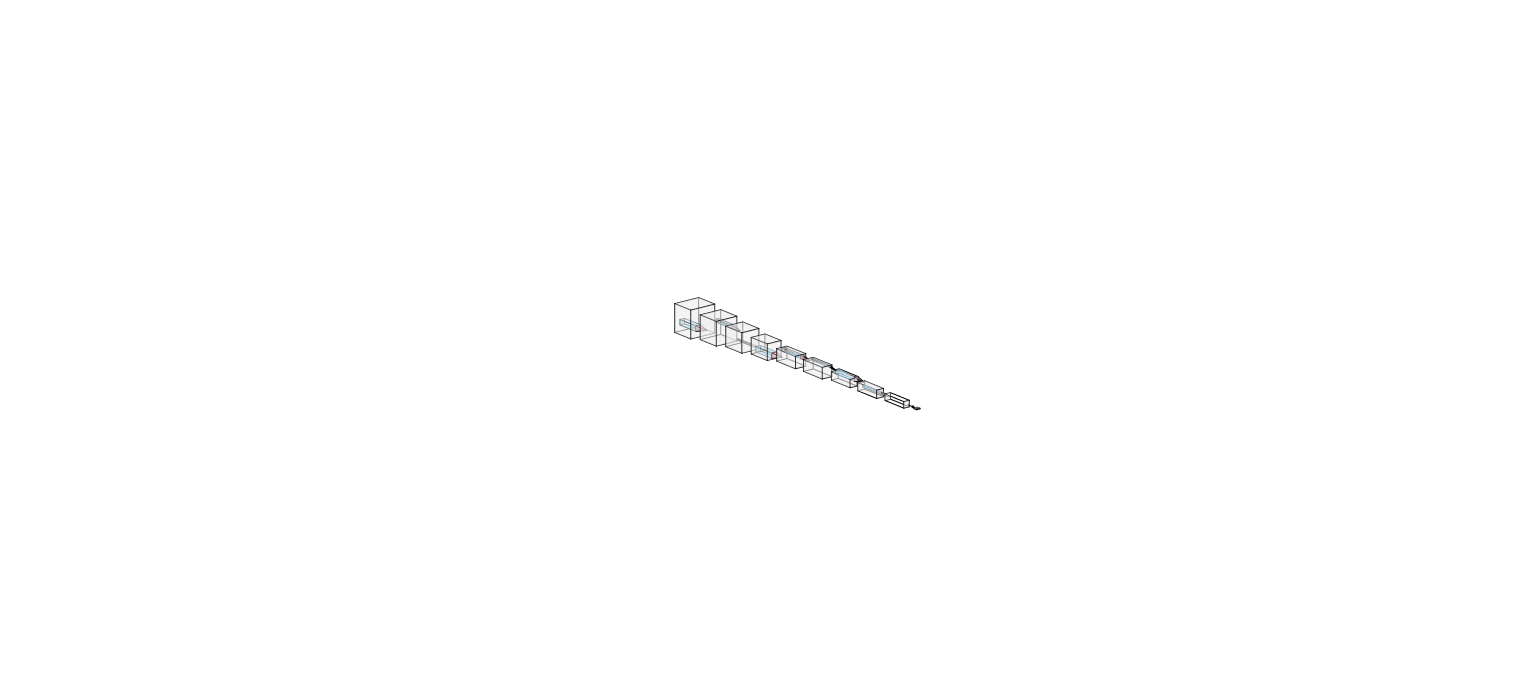

In [ ]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=9, strides = 2,padding = 'same',activation="relu")(inputs)

    x = layers.Conv3D(filters=64, kernel_size=5, strides = 2,padding = 'same',activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2,strides = 1)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=9, strides = 2,padding = 'same',activation="relu")(x)

    x = layers.Conv3D(filters=256, kernel_size=5, strides = 2,padding = 'same',activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2,strides = 1)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=7,strides = 2,padding = 'same',activation="relu")(x)

    x = layers.Conv3D(filters=256, kernel_size=3, strides = 1,padding = 'same',activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2,strides = 1)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 64, 1)  0         
                             ]                                   
                                                                 
 conv3d_6 (Conv3D)           (None, 64, 64, 32, 64)    46720     
                                                                 
 conv3d_7 (Conv3D)           (None, 32, 32, 16, 64)    512064    
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 31, 31, 15, 64)   0         
 3D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 31, 31, 15, 64)   256       
 hNormalization)                                                 
                                                             

In [ ]:
# Compile model.
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 50
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/50
70/70 - 28s - loss: 0.7945 - acc: 0.5857 - val_loss: 15.8390 - val_acc: 0.5000 - 28s/epoch - 398ms/step
Epoch 2/50
70/70 - 27s - loss: 0.7063 - acc: 0.5714 - val_loss: 2.4299 - val_acc: 0.5000 - 27s/epoch - 388ms/step
Epoch 3/50
70/70 - 26s - loss: 0.6676 - acc: 0.6143 - val_loss: 3.6942 - val_acc: 0.5000 - 26s/epoch - 368ms/step
Epoch 4/50
70/70 - 27s - loss: 0.7006 - acc: 0.5714 - val_loss: 0.6600 - val_acc: 0.5667 - 27s/epoch - 391ms/step
Epoch 5/50
70/70 - 26s - loss: 0.6948 - acc: 0.5429 - val_loss: 0.6610 - val_acc: 0.6167 - 26s/epoch - 365ms/step
Epoch 6/50
70/70 - 26s - loss: 0.6745 - acc: 0.5571 - val_loss: 2.8241 - val_acc: 0.5000 - 26s/epoch - 367ms/step
Epoch 7/50
70/70 - 26s - loss: 0.6791 - acc: 0.5857 - val_loss: 0.7405 - val_acc: 0.5500 - 26s/epoch - 369ms/step
Epoch 8/50
70/70 - 26s - loss: 0.7428 - acc: 0.5429 - val_loss: 1.2044 - val_acc: 0.5000 - 26s/epoch - 366ms/step
Epoch 9/50
70/70 - 26s - loss: 0.7023 - acc: 0.5286 - val_loss: 1.2453 - val_acc: 0.500

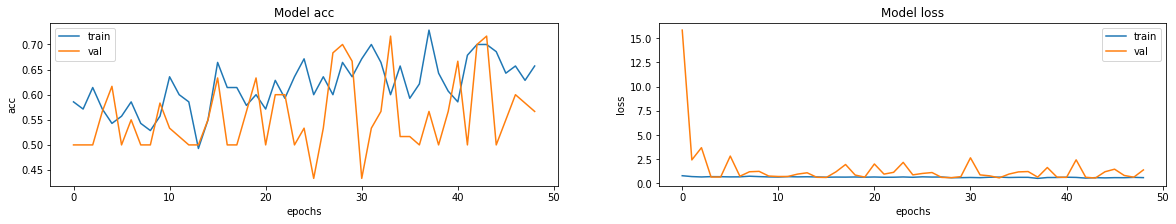

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
# Load best weights.
model.load_weights("3d_image_classification.h5")
prediction = model.predict(np.expand_dims(x_val[0], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )

1/1 [==============================] - 0s 101ms/step
This model is 37.61 percent confident that CT scan is normal
This model is 62.39 percent confident that CT scan is abnormal


In [ ]:
covidpred = []
for i in range(0,30):
  Y_pred = model.predict(np.expand_dims(x_val[i], axis=0))[0]
  print(Y_pred)
  covidpred.append(Y_pred)

noncovidpred = []
for i in range(30,60):
  Y_pred = model.predict(np.expand_dims(x_val[i], axis=0))[0]
  print(Y_pred)
  noncovidpred.append(Y_pred)

1/1 [==============================] - 0s 18ms/step
[0.6238529]
1/1 [==============================] - 0s 18ms/step
[0.53604585]
1/1 [==============================] - 0s 19ms/step
[0.6739036]
1/1 [==============================] - 0s 17ms/step
[0.6823427]
1/1 [==============================] - 0s 17ms/step
[0.42711866]
1/1 [==============================] - 0s 19ms/step
[0.60897166]
1/1 [==============================] - 0s 18ms/step
[0.31511417]
1/1 [==============================] - 0s 17ms/step
[0.64576954]
1/1 [==============================] - 0s 17ms/step
[0.6258253]
1/1 [==============================] - 0s 19ms/step
[0.47362489]
1/1 [==============================] - 0s 16ms/step
[0.60818076]
1/1 [==============================] - 0s 17ms/step
[0.68665624]
1/1 [==============================] - 0s 22ms/step
[0.5886498]
1/1 [==============================] - 0s 20ms/step
[0.6009766]
1/1 [==============================] - 0s 18ms/step
[0.6103878]
1/1 [===========================

In [ ]:
y_pred1 = []
for i in (covidpred):
  if i >= 0.5:
    y_pred1.append(1)
  else :
    y_pred1.append(0)
print(len(y_pred1))
print(y_pred1)


y_pred2 = []
for i in (noncovidpred):
  if i >= 0.5:
    y_pred2.append(1)
  else :
    y_pred2.append(0)
print(len(y_pred2))
print(y_pred2)

import numpy as np

y_predz = y_pred1+ y_pred2
print(len(y_predz))
print(y_predz)


30
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
30
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]
60
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]


Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.80      0.74        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60



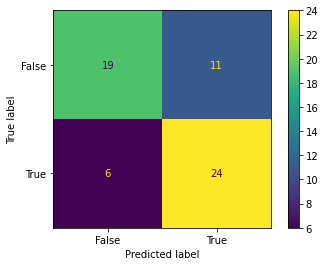

In [ ]:

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_val, y_predz))
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_val, y_predz)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import os
# Folder "CT-0" consist of CT scans having normal lung tissue,
# no CT-signs of viral pneumonia.
normal_scan_paths1 = [
    os.path.join(os.getcwd(), "/content/drive/MyDrive/NON_COVID", x)
    for x in os.listdir("/content/drive/MyDrive/NON_COVID")
]
# Folder "CT-23" consist of CT scans having several ground-glass opacifications,
# involvement of lung parenchyma.
abnormal_scan_paths1 = [
    os.path.join(os.getcwd(), "/content/drive/MyDrive/COVID", x)
    for x in os.listdir("/content/drive/MyDrive/COVID")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths1)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths1)))

CT scans with normal lung tissue: 15
CT scans with abnormal lung tissue: 57


In [ ]:
# Read and process the scans.
# Each scan is resized across height, width, and depth and rescaled.
abnormal_scans1 = np.array([process_scan(path) for path in abnormal_scan_paths1])
normal_scans1 = np.array([process_scan(path) for path in normal_scan_paths1])

# For the CT scans having presence of viral pneumonia
# assign 1, for the normal ones assign 0.
abnormal_labels1 = np.array([1 for _ in range(len(abnormal_scans1))])
normal_labels1 = np.array([0 for _ in range(len(normal_scans1))])

# Split data in the ratio 70-30 for training and validation.
x_train1 = np.concatenate((abnormal_scans1[:38], normal_scans1[:10]), axis=0)
y_train1 = np.concatenate((abnormal_labels1[:38], normal_labels1[:10]), axis=0)
x_val1 = np.concatenate((abnormal_scans1[38:], normal_scans1[10:]), axis=0)
y_val1 = np.concatenate((abnormal_labels1[38:], normal_labels1[10:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train1.shape[0], x_val1.shape[0])
)

Number of samples in train and validation are 48 and 24.


In [ ]:
# Load best weights.
model.load_weights("3d_image_classification.h5")
prediction = model.predict(np.expand_dims(x_val1[0], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )